<a href="https://colab.research.google.com/github/yuvaraj119/Python-Pdf-Books/blob/master/rock_paper_scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2019-10-05 14:09:14--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  64.7MB/s    in 3.0s    

2019-10-05 14:09:18 (64.7 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2019-10-05 14:09:22--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/rp

In [1]:
!pip install kaggle

In [0]:
!mkdir /root/.kaggle
!echo '{"username":"yuvaraj119","key":"6d825a30fb91506cf1a1b5849b8f24a8"}' > /root/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d yuvaraj119/rockpaperscissors

 98% 369M/377M [00:09<00:00, 25.1MB/s]
100% 377M/377M [00:09<00:00, 41.7MB/s]


In [4]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

import numpy as np
import os
import zipfile

In [0]:
local_zip = '/content/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

#local_zip = '/content/rps-test-set.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('/content/')
#zip_ref.close()

In [7]:
rock_dir = os.path.join('/content/rps/rock')
paper_dir = os.path.join('/content/rps/paper')
scissors_dir = os.path.join('/content/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

class_names = ['Paper', 'Rock', 'Scissors']
print(class_names)

total training rock images: 1206
total training paper images: 1199
total training scissors images: 1218
['rock03-107.png', 'rock07-k03-074.png', 'rock05ck01-065.png', 'wzcE5Sx0VwqjWQhs.png', 'rock02-056.png', 'rock06ck02-119.png', 'rock02-099.png', 'rock04-021.png', 'XmtW0hEB1JqbZ3eu.png', 'IMG_20191110_241446702.png']
['SrSUeH255dybz2zi.png', 'pVCqrp8S6Ze3DAI8.png', 'V9v5VHsYgQOVnzo2.png', 'paper07-077.png', 'paper04-033.png', 'yB11HwUEuYHhVlKo.png', 'n5NXfZTRonR4iOr0.png', 'xha8stYdUnt02zKI.png', 'paper01-069.png', 'NnWvTxntBJ5mFY73.png']
['scissors03-011.png', 'scissors01-036.png', 'testscissors01-051.png', 'scissors04-063.png', '6CyIuv1pvHDwTWmR.png', 'EiSbUEkcpA3vRMGd.png', 'scissors01-039.png', 'scissors03-108.png', 'testscissors01-017.png', 'bI7SDSU3g7fZsxRM.png']
['Paper', 'Rock', 'Scissors']


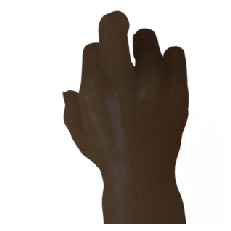

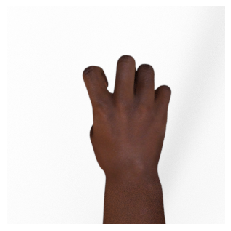

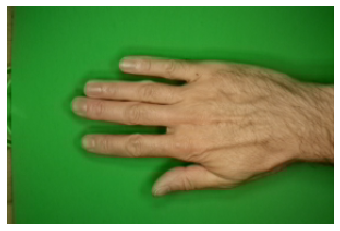

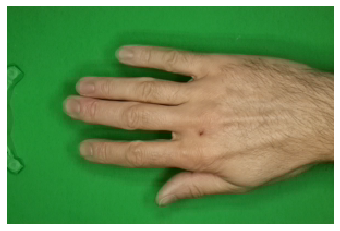

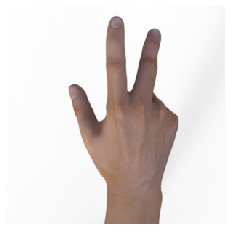

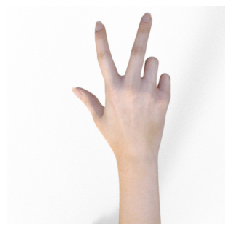

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [0]:
# Save the quantized model to file to the Downloads directory
def saveQuantizedModel(tflite_quantized_model):
    f = open('rps.tflite', "wb")
    f.write(tflite_quantized_model)
    f.close()

    # Download the digit classification model
    from google.colab import files
    files.download('rps.tflite')

    print('`rps.tflite` has been downloaded')

In [0]:
def reconvertUsingQuantization(converter,float_model_size):
    # Re-convert the model to TF Lite using quantization.
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    tflite_quantized_model = converter.convert()

    # Show model size in KBs.
    quantized_model_size = len(tflite_quantized_model) / 1024
    print('Quantized model size = %dKBs,' % quantized_model_size)
    print('which is about %d%% of the float model size.'\
          % (quantized_model_size * 100 / float_model_size))
    saveQuantizedModel(tflite_quantized_model)

In [0]:
def convertModel(model,isColab):
    # Convert Keras model to TF Lite format.
    if(isColab==True):
      converter = tf.lite.TFLiteConverter.from_keras_model_file('rps.h5') 
    else:
      converter = tf.lite.TFLiteConverter.from_keras_model(model)
      
    tflite_float_model = converter.convert()

    # Show model size in KBs.
    float_model_size = len(tflite_float_model) / 1024
    print('Float model size = %dKBs.' % float_model_size)
    reconvertUsingQuantization(converter,float_model_size)

In [0]:
import matplotlib.pyplot as plt

def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [13]:
TRAINING_DIR = "/content/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip = True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical'
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

#model.summary()

optimizer_sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)
optimizer_adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
optimizer_rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

model.compile(loss = 'categorical_crossentropy', optimizer=optimizer_adam, metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")
convertModel(model,True)
show_final_history(history)


Found 3623 images belonging to 3 classes.
Found 1376 images belonging to 3 classes.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Epoch 1/25
114/114 [==============================] - 57s 501ms/step - loss: 1.1471 - acc: 0.3323 - val_loss: 1.0989 - val_acc: 0.2769
Epoch 2/25
114/114 [==============================] - 52s 458ms/step - loss: 1.0977 - acc: 0.3536 - val_loss: 1.0985 - val_acc: 0.3045
Epoch 3/25
114/114 [==============================] - 51s 451ms/step - loss: 1.0904 - acc: 0.3820 - val_loss: 1.0792 - val_acc: 0.4520
Epoch 4/25
114/114 [==============================] - 51s 450ms/step - loss: 1.0121 - acc: 0.4678 - val_loss: 1.0254 - val_acc: 0.3830
Epoch 5/25
114/114 [==============================] - 51s 443ms/step - loss: 0.8889 - acc: 0.5738 - val_loss: 0.7450 - val_acc: 0.6875
Epoch 6/25
114/114 [==============================] - 50s 440ms/step - loss: 0.6649 - acc: 0.7212 - val_loss: 0.4473 - val_acc: 0.8714
Epoch 7/25
114/114 [=====

AttributeError: ignored

In [14]:
print( tf.VERSION )

1.15.0


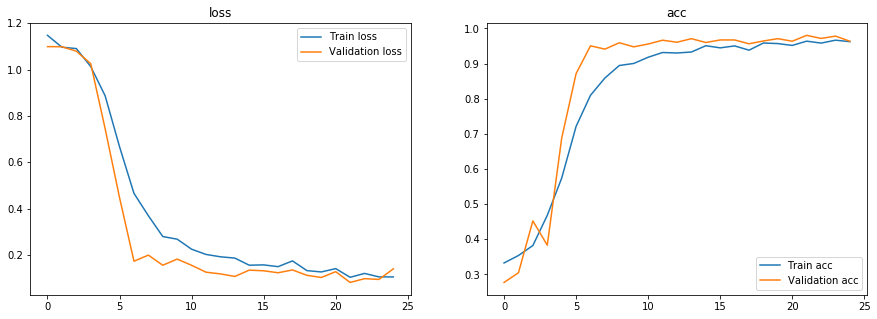

In [26]:
show_final_history(history)

In [16]:
converter = tf.lite.TFLiteConverter.from_keras_model_file('rps.h5') 
model = converter.convert()

tfmodel = converter.convert() 
open ("rps.tflite" , "wb") .write(tfmodel)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 12 variables.
INFO:tensorflow:Converted 12 variables to const ops.


38800716

In [34]:
convertModel(model,True)

INFO:tensorflow:Froze 12 variables.
INFO:tensorflow:Converted 12 variables to const ops.
Float model size = 37891KBs.
Quantized model size = 9477KBs,
which is about 25% of the float model size.
`rps.tflite` has been downloaded


In [27]:
# dimensions of our images
img_width, img_height = 224, 224

# load the model we saved
model = tf.keras.models.load_model('/content/rps.h5')
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

path = "/content/rps-test-set/paper/4.png"
# predicting images
img = image.load_img(path, target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
print(classes)

# predicting multiple images at once
img = image.load_img(path, target_size=(img_width, img_height))
y = image.img_to_array(img)
y = np.expand_dims(y, axis=0)

# pass the list of multiple images np.vstack()
images = np.vstack([x, y])
classes = model.predict_classes(images, batch_size=10)

# print the classes, the images belong to
print(classes)
print(classes[0])

[0]
[0 0]
0


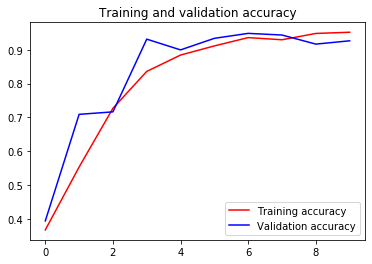

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()



### Visualizing Intermediate Representations

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random cat or dog image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

['conv2d_20', 'max_pooling2d_20', 'conv2d_21', 'max_pooling2d_21', 'conv2d_22', 'max_pooling2d_22', 'conv2d_23', 'max_pooling2d_23', 'conv2d_24', 'max_pooling2d_24', 'flatten_4', 'dropout_4', 'dense_8', 'dense_9']
(1, 149, 149, 64)
(1, 147, 147, 64)
(1, 73, 73, 64)
(1, 71, 71, 64)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide



(1, 35, 35, 64)
(1, 33, 33, 128)
(1, 16, 16, 128)
(1, 14, 14, 128)
(1, 7, 7, 128)
(1, 6272)
(1, 6272)
(1, 512)
(1, 3)


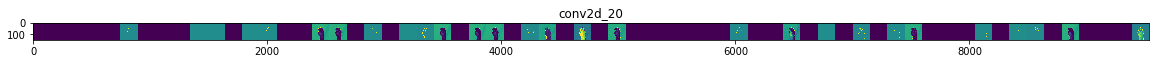

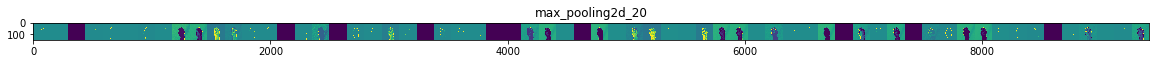

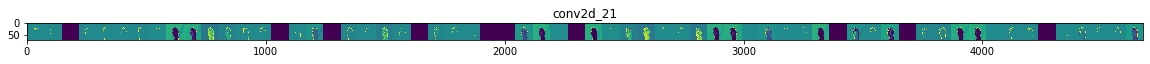

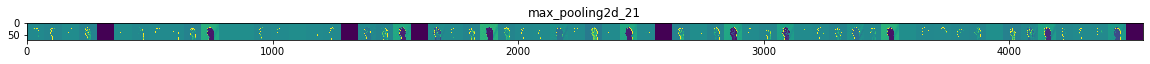

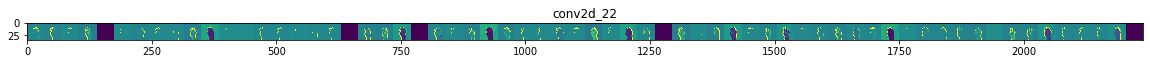

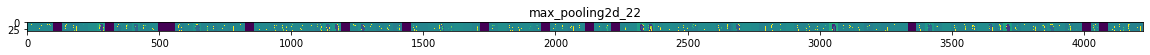

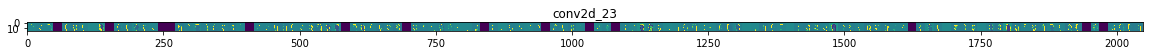

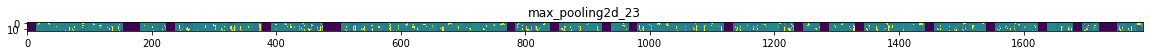

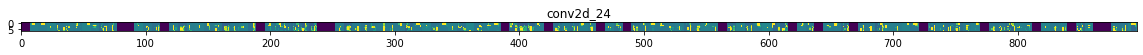

In [0]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
rock_img_files = [os.path.join(rock_dir, f) for f in rock_files]
paper_img_files = [os.path.join(paper_dir, f) for f in paper_files]
scissors_img_files = [os.path.join(scissors_dir, f) for f in scissors_files]

img_path = random.choice(rock_img_files + paper_img_files + scissors_img_files)
img = load_img(img_path, target_size=(224, 224))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)
# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
print(layer_names)
# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

In [0]:
# predicting images
path = "/content/data/IMG_20191110_241609381.jpg"
img = image.load_img(path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
#print(fn)
print(classes)#[[paper,rock,scissors]]

[[0. 1. 0.]]


[[0.040052   0.06938137 0.89056665]]
0.89056665
Scissors


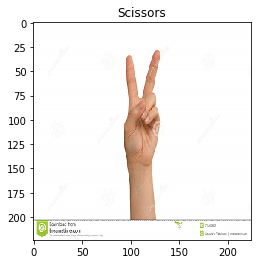

In [31]:
class_names = [['Paper', 'Rock', 'Scissors']]
path = "/content/rps-test-set/scissors/6.png"
img = image.load_img(path,target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255

proba = model.predict(img.reshape(1,224,224,3))
print(proba)
print(np.amax(proba))
result = np.where(proba == np.amax(proba))
# zip the 2 arrays to get the exact coordinates
listOfCordinates = list(zip(result[0], result[1]))
# travese over the list of cordinates
for x,y in listOfCordinates:
    print(class_names[x][y])
    plt.title(class_names[x][y])

plt.imshow(img)

In [36]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving 6.png to 6 (1).png


TypeError: ignored

In [22]:
tfmodel.summary()

AttributeError: ignored